In [1]:
import pandas as pd
import neattext.functions as nfx
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from textblob import TextBlob
import numpy as np


In [2]:
data = pd.read_csv("C:/Users/Nasibullah Qarizada/Desktop/dataset.csv")
data.head()

,id,conversation_id,created_at,date,time,timezone,user_id,username,name,place,...,geo,source,user_rt_id,user_rt,retweet_id,reply_to,retweet_date,translate,trans_src,trans_dest
0,1.510000e+23,1.510000e+23,2022-04-15 02:24:13 Turkey Standard Time,15.04.2022,02:24:13,300,1.400000e+22,blurbs_s,Bet’s Blurbs,NaN,...,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN
1,1.510000e+23,1.510000e+23,2022-04-15 02:19:25 Turkey Standard Time,15.04.2022,02:19:25,300,8.230000e+22,sandyk1971,Sandy King,NaN,...,NaN,NaN,NaN,NaN,NaN,"[{'screen_name': 'DaphneSheaves', 'name': 'Dap...",NaN,NaN,NaN,NaN
2,1.510000e+23,1.510000e+23,2022-04-15 02:19:10 Turkey Standard Time,15.04.2022,02:19:10,300,1.460000e+23,weikelsherry,Sherry Weikel Weikels,NaN,...,NaN,NaN,NaN,NaN,NaN,"[{'screen_name': '0ld_School_', 'name': 'Anti-...",NaN,NaN,NaN,NaN
3,1.510000e+23,1.510000e+23,2022-04-15 02:18:31 Turkey Standard Time,15.04.2022,02:18:31,300,1.050000e+23,thebias_news,THE BIAS,NaN,...,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN
4,1.510000e+23,1.510000e+23,2022-04-15 02:17:38 Turkey Standard Time,15.04.2022,02:17:38,300,4.004777e+09,thewritediva,Shaneequa Cannon,NaN,...,NaN,NaN,NaN,NaN,NaN,"[{'screen_name': 'D_Bone', 'name': 'D.Dave the...",NaN,NaN,NaN,NaN


In [3]:
data.isnull().sum()

id                     0
conversation_id        0
created_at             0
date                   0
time                   0
timezone               0
user_id                0
username               0
name                   0
place              10005
tweet                  0
language               0
mentions               0
urls                   0
photos                 0
replies_count          0
retweets_count         0
likes_count            0
hashtags               0
cashtags               0
link                   0
retweet                0
quote_url          10005
video                  0
thumbnail          10005
near               10005
geo                10005
source             10005
user_rt_id         10005
user_rt            10005
retweet_id         10005
reply_to               0
retweet_date       10005
translate          10005
trans_src          10005
trans_dest         10005
dtype: int64

In [4]:
data.drop('id', axis=1, inplace=True)
data.drop('conversation_id', axis=1, inplace=True)
data.drop('user_id', axis=1, inplace=True)
data.drop('username', axis=1, inplace=True)
data.drop('urls', axis=1, inplace=True)
data.drop('photos', axis=1, inplace=True)

data.drop('timezone', axis=1, inplace=True)
data.drop('name', axis=1, inplace=True)
data.drop('place', axis=1, inplace=True)
data.drop('geo', axis=1, inplace=True)
data.drop('source', axis=1, inplace=True)
data.drop('user_rt_id', axis=1, inplace=True)

data.drop('user_rt', axis=1, inplace=True)
data.drop('date', axis=1, inplace=True)
data.drop('created_at', axis=1, inplace=True)
data.drop('hashtags', axis=1, inplace=True)
data.drop('cashtags', axis=1, inplace=True)
data.drop('retweet', axis=1, inplace=True)

data.drop('time', axis=1, inplace=True)
data.drop('language', axis=1, inplace=True)
data.drop('mentions', axis=1, inplace=True)
data.drop('video', axis=1, inplace=True)
data.drop('near', axis=1, inplace=True)
data.drop('reply_to', axis=1, inplace=True)

data.drop('replies_count', axis=1, inplace=True)
data.drop('retweets_count', axis=1, inplace=True)
data.drop('likes_count', axis=1, inplace=True)
data.drop('link', axis=1, inplace=True)
data.drop('quote_url', axis=1, inplace=True)
data.drop('thumbnail', axis=1, inplace=True)

data.drop('retweet_id', axis=1, inplace=True)
data.drop('retweet_date', axis=1, inplace=True)
data.drop('translate', axis=1, inplace=True)
data.drop('trans_src', axis=1, inplace=True)
data.drop('trans_dest', axis=1, inplace=True)

In [5]:
data.dtypes

tweet    object
dtype: object

In [6]:
data['clean_tweet'] = data['tweet'].apply(nfx.remove_hashtags)
data['clean_tweet'] = data['clean_tweet'].apply(lambda x: nfx.remove_userhandles(x))
data['clean_tweet'] = data['clean_tweet'].apply(nfx.remove_urls)
data['clean_tweet'] = data['clean_tweet'].apply(nfx.remove_puncts)
data['clean_tweet'] = data['clean_tweet'].apply(nfx.remove_multiple_spaces)
data['clean_tweet'] = data['clean_tweet'].apply(nfx.remove_stopwords)
data[['tweet', 'clean_tweet']]

,tweet,clean_tweet
0,Maybe people would take Covid more seriously i...,Maybe people Covid seriously physically eviden...
1,@DaphneSheaves Funny . Not me . Just back aft...,Funny brief spell covid day office able home I...
2,@0ld_School_ @komonews Well what the F did you...,F covid Brain washed koolaid drinking TS
3,Los Angeles Times: California lawmaker scraps ...,Los Angeles Times: California lawmaker scraps ...
4,@D_Bone Believe it’s airborne. And often these...,Believe it’s airborne “I went nowhere” people ...
...,...,...
10000,@shplinters @EssexPR A study done by Johns Hop...,study Johns Hopkins university found lockdowns...
10001,@PplsCityCouncil @avitale @kennethmejiaLA @Fil...,allocation monies Covid relief directed deterr...
10002,@humanutella I'm really relieved that I'm no l...,Im relieved Im longer teaching Schools covid p...
10003,@tara_taylor @AnnaHalifax So many of my cowork...,coworkers school got covid Dec amp Dec felt ok...


In [7]:
data['clean_tweet'].iloc[3]

'Los Angeles Times: California lawmaker scraps plan require COVID19 vaccinations school children'

In [8]:
# Cleaning Text: Punctuations
data['tokenized'] = data['clean_tweet'].apply(lambda x: x.split())

In [9]:
data['tokenized'].iloc[3]

['Los',
 'Angeles',
 'Times:',
 'California',
 'lawmaker',
 'scraps',
 'plan',
 'require',
 'COVID19',
 'vaccinations',
 'school',
 'children']

In [10]:
data

,tweet,clean_tweet,tokenized
0,Maybe people would take Covid more seriously i...,Maybe people Covid seriously physically eviden...,"[Maybe, people, Covid, seriously, physically, ..."
1,@DaphneSheaves Funny . Not me . Just back aft...,Funny brief spell covid day office able home I...,"[Funny, brief, spell, covid, day, office, able..."
2,@0ld_School_ @komonews Well what the F did you...,F covid Brain washed koolaid drinking TS,"[F, covid, Brain, washed, koolaid, drinking, TS]"
3,Los Angeles Times: California lawmaker scraps ...,Los Angeles Times: California lawmaker scraps ...,"[Los, Angeles, Times:, California, lawmaker, s..."
4,@D_Bone Believe it’s airborne. And often these...,Believe it’s airborne “I went nowhere” people ...,"[Believe, it’s, airborne, “I, went, nowhere”, ..."
...,...,...,...
10000,@shplinters @EssexPR A study done by Johns Hop...,study Johns Hopkins university found lockdowns...,"[study, Johns, Hopkins, university, found, loc..."
10001,@PplsCityCouncil @avitale @kennethmejiaLA @Fil...,allocation monies Covid relief directed deterr...,"[allocation, monies, Covid, relief, directed, ..."
10002,@humanutella I'm really relieved that I'm no l...,Im relieved Im longer teaching Schools covid p...,"[Im, relieved, Im, longer, teaching, Schools, ..."
10003,@tara_taylor @AnnaHalifax So many of my cowork...,coworkers school got covid Dec amp Dec felt ok...,"[coworkers, school, got, covid, Dec, amp, Dec,..."


In [11]:


def get_sentiment(tweet):
    blob = TextBlob(tweet)
    sentiment_polarity = blob.sentiment.polarity
    sentiment_subjectivity = blob.sentiment.subjectivity
    if sentiment_polarity > 0:
        sentiment_label = '1'
    elif sentiment_polarity <= 0:
        sentiment_label = '-1'

    result = {'polarity':sentiment_polarity,
              'subjectivity':sentiment_subjectivity,
              'sentiment':sentiment_label}
    return result

In [12]:
ex1 = data['clean_tweet'].iloc[100]

In [13]:
get_sentiment(ex1)

{'polarity': 0.1, 'subjectivity': 0.9, 'sentiment': '1'}

In [14]:
data['sentiment_results'] = data['clean_tweet'].apply(get_sentiment)

In [15]:
data['sentiment_results']

0        {'polarity': 0.1, 'subjectivity': 0.325, 'sent...
1        {'polarity': 0.10833333333333334, 'subjectivit...
2        {'polarity': 0.0, 'subjectivity': 0.0, 'sentim...
3        {'polarity': 0.0, 'subjectivity': 0.0, 'sentim...
4        {'polarity': 0.25757575757575757, 'subjectivit...
                               ...                        
10000    {'polarity': 0.0, 'subjectivity': 0.0, 'sentim...
10001    {'polarity': 0.1, 'subjectivity': 0.35, 'senti...
10002    {'polarity': 0.16666666666666666, 'subjectivit...
10003    {'polarity': 0.19999999999999998, 'subjectivit...
10004    {'polarity': 0.0, 'subjectivity': 0.0, 'sentim...
Name: sentiment_results, Length: 10005, dtype: object

In [16]:
pd.json_normalize(data['sentiment_results'].iloc[100])

,polarity,subjectivity,sentiment
0,0.1,0.9,1


In [17]:
data = data.join(pd.json_normalize(data['sentiment_results']))
data.head()

,tweet,clean_tweet,tokenized,sentiment_results,polarity,subjectivity,sentiment
0,Maybe people would take Covid more seriously i...,Maybe people Covid seriously physically eviden...,"[Maybe, people, Covid, seriously, physically, ...","{'polarity': 0.1, 'subjectivity': 0.325, 'sent...",0.100000,0.325000,1
1,@DaphneSheaves Funny . Not me . Just back aft...,Funny brief spell covid day office able home I...,"[Funny, brief, spell, covid, day, office, able...","{'polarity': 0.10833333333333334, 'subjectivit...",0.108333,0.543056,1
2,@0ld_School_ @komonews Well what the F did you...,F covid Brain washed koolaid drinking TS,"[F, covid, Brain, washed, koolaid, drinking, TS]","{'polarity': 0.0, 'subjectivity': 0.0, 'sentim...",0.000000,0.000000,-1
3,Los Angeles Times: California lawmaker scraps ...,Los Angeles Times: California lawmaker scraps ...,"[Los, Angeles, Times:, California, lawmaker, s...","{'polarity': 0.0, 'subjectivity': 0.0, 'sentim...",0.000000,0.000000,-1
4,@D_Bone Believe it’s airborne. And often these...,Believe it’s airborne “I went nowhere” people ...,"[Believe, it’s, airborne, “I, went, nowhere”, ...","{'polarity': 0.25757575757575757, 'subjectivit...",0.257576,0.629630,1


In [18]:
data['sentiment'].value_counts()

-1    5566
1     4439
Name: sentiment, dtype: int64

<AxesSubplot:xlabel='sentiment', ylabel='count'>

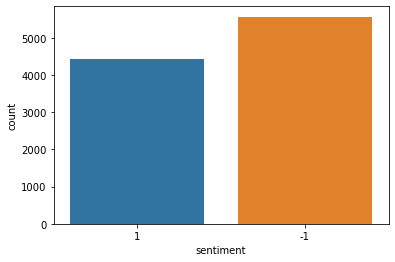

In [19]:

sns.countplot(data['sentiment'])

In [20]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10005 entries, 0 to 10004
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   tweet              10005 non-null  object 
 1   clean_tweet        10005 non-null  object 
 2   tokenized          10005 non-null  object 
 3   sentiment_results  10005 non-null  object 
 4   polarity           10005 non-null  float64
 5   subjectivity       10005 non-null  float64
 6   sentiment          10005 non-null  object 
dtypes: float64(2), object(5)
memory usage: 547.3+ KB


In [21]:
tweet_df = data[['clean_tweet','sentiment']]

print(tweet_df.shape)
tweet_df.head(5)

(10005, 2)


,clean_tweet,sentiment
0,Maybe people Covid seriously physically eviden...,1
1,Funny brief spell covid day office able home I...,1
2,F covid Brain washed koolaid drinking TS,-1
3,Los Angeles Times: California lawmaker scraps ...,-1
4,Believe it’s airborne “I went nowhere” people ...,1


In [22]:
tweet_df["sentiment"].value_counts()

-1    5566
1     4439
Name: sentiment, dtype: int64

In [23]:
tweet = tweet_df.clean_tweet.values
path = r'C:/Users/Nasibullah Qarizada/Desktop/data2.csv'

data.to_csv(path)